## This notebook is my first attempt at visualizing the data provided :)

<a id="toc_section"></a>
## Contents of this notebook

[**Raghav Rastogi**](https://www.kaggle.com/raghavrastogi75) 


* [Data Glance](#1)
* [Things to find](#2)
* [Plotting average prices with respect to region and time](#3)
    - [Albany](#4)
    - [Sacramento](#5)
* [Finding and plotting avocados plotted state-wise](#6)
    - [Mapping the number of '4046' units sold with the average price](#7)
    - [Mapping the number of '4225' units sold with the average price](#8)
    - [Mapping the number of '4770' units sold with the averagae price](#9)
* [Avocados sold based on region](#10)
* [Comparing total Convention and Organic avocados sold over time](#11)
* [Some fun plots](#12)


### Please have a look and upvote if you found it useful. Also comment and let me know the ways I can improve my code, ask better questions or if there are any doubts.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


## Let's have a look at the data
<span id="1"></span>

In [2]:
avocado = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')
print(avocado.head())
#print(avocado['region'].unique())
#print(avocado['year'].unique())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

# Things to find out
<span id="2"></span>

* Finding average price according to the date in regions
* Finding the avocados sold category wise (PLU4046, PLU4225, PLU4770) with respect to time
* Avocados sold based on region
* Some fun with the data

# 1) Plotting the average price according to the date for different regions<span id="3"></span>

### Starting with Albany<span id="4"></span>

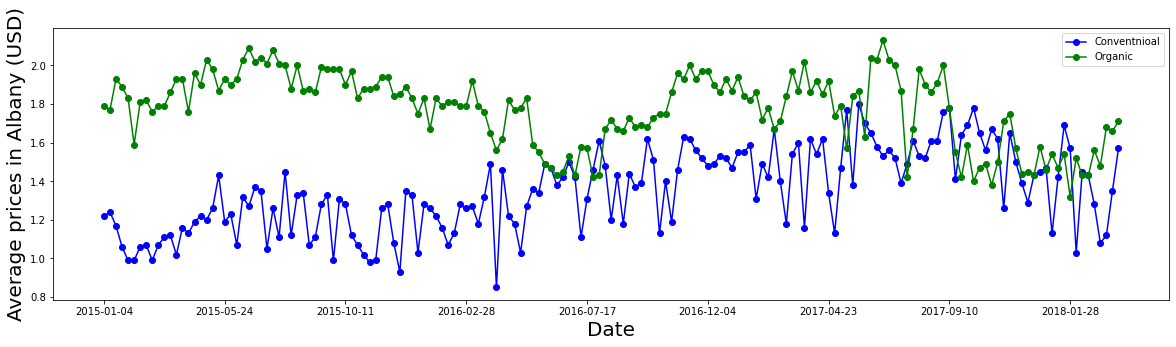

In [3]:
avocado['Date'] = avocado['Date'].astype('Datetime64')
avocado_albany_c = avocado.loc[(avocado['region'] == 'Albany') & (avocado['type'] == 'conventional')].sort_values(by = 'Date')
avocado_albany_o = avocado.loc[(avocado['region'] == 'Albany') & (avocado['type'] == 'organic')].sort_values(by = 'Date')
#fig,ax = plt.subplots()
plt.figure(figsize = (20,5))
plt.plot(avocado_albany_c.loc[avocado['type'] == 'conventional']["Date"],avocado_albany_c['AveragePrice'],'bo-',label = 'Conventnioal')
plt.plot(avocado_albany_o.loc[avocado['type'] == 'organic']["Date"],avocado_albany_o['AveragePrice'],'go-',label = 'Organic')
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Average prices in Albany (USD)',fontsize = 20)
plt.xticks(avocado_albany_c['Date'][::20])
plt.legend()
plt.show()



We can see that, overall, organic avocados are more expensive than conventional. 

### Next with Sacramento <span id="5"></span>
Lets take up another region and see what comes up.

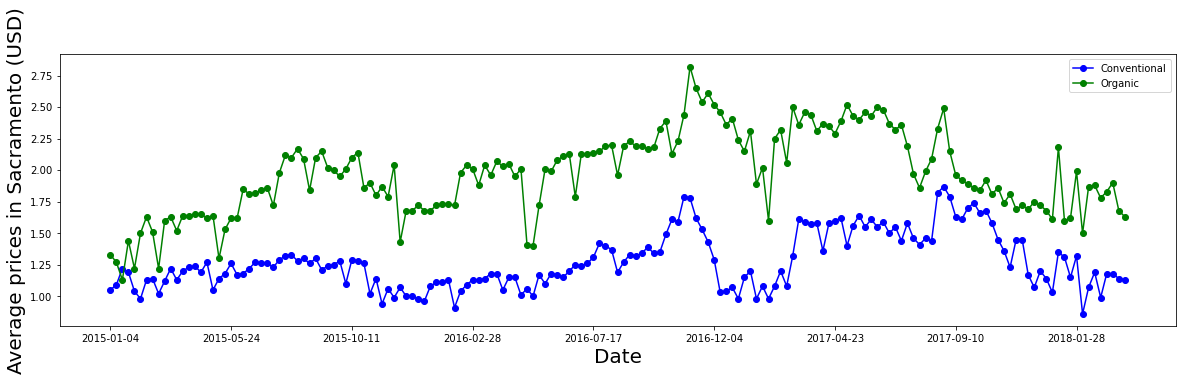

In [4]:
avocado_Sacramento_c = avocado.loc[((avocado['region'] == 'Sacramento')) & (avocado['type'] == 'conventional')].sort_values(by = 'Date')
avocado_Sacramento_o = avocado.loc[((avocado['region'] == 'Sacramento')) & (avocado['type'] == 'organic')].sort_values(by = 'Date')
plt.figure(figsize = (20,5))
plt.plot(avocado_Sacramento_c["Date"],avocado_Sacramento_c['AveragePrice'],'bo-',label = 'Conventional')
plt.plot(avocado_Sacramento_o["Date"],avocado_Sacramento_o['AveragePrice'],'go-', label = 'Organic')
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Average prices in Sacramento (USD)',fontsize = 20)
plt.xticks(avocado_Sacramento_o['Date'][::20])
plt.legend()
plt.show()



This pattern is observed here as well.

### Let's try to plot all regions in one plot (it could get messy :P)

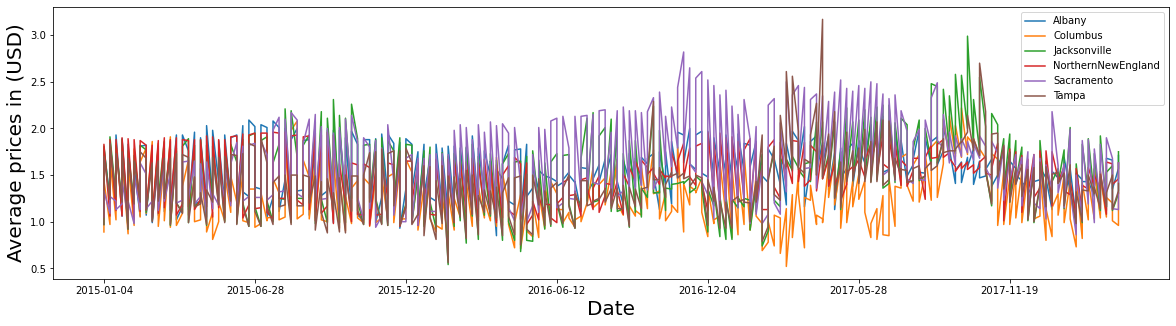

In [5]:
#Finding all unique regions in the dataset
#print(avocado['region'].unique())

regions = ['Albany','Atlanta','BaltimoreWashington','Boise','Boston','BuffaloRochester','California','Charlotte','Chicago','CincinnatiDayton','Columbus','DallasFtWorth','Denver','Detroit','GrandRapids','GreatLakes','HarrisburgScranton','HartfordSpringfield','Houston','Indianapolis','Jacksonville','LasVegas','LosAngeles','Louisville','MiamiFtLauderdale','Midsouth','Nashville','NewOrleansMobile','NewYork','Northeast','NorthernNewEngland','Orlando','Philadelphia','PhoenixTucson','Pittsburgh','Plains','Portland','RaleighGreensboro','RichmondNorfolk','Roanoke','Sacramento','SanDiego','SanFrancisco','Seattle','SouthCarolina','SouthCentral','Southeast','Spokane','StLouis','Syracuse','Tampa','TotalUS','West','WestTexNewMexico']
avocado_region = avocado.loc[(avocado['region'] == 'Sacramento')].sort_values(by = 'Date')
plt.figure(figsize = (20,5))
for i in range(0,len(regions),10):
    
    avocado_region = avocado.loc[(avocado['region'] == regions[i])].sort_values(by = 'Date')
    #plt.figure(figsize = (20,5))
    plt.plot(avocado_region["Date"],avocado_region['AveragePrice'],label = regions[i])
    plt.xlabel('Date',fontsize = 20)
    plt.ylabel('Average prices in (USD)',fontsize = 20)
    plt.xticks(avocado_region['Date'][::50])
plt.legend()

plt.show()
    


Plotting just 6 regions is messy due to addition of both organic and conventional in 1 plot.

### Let's try to average out the prices monthly and see the overall trend (organic and conventional combined).

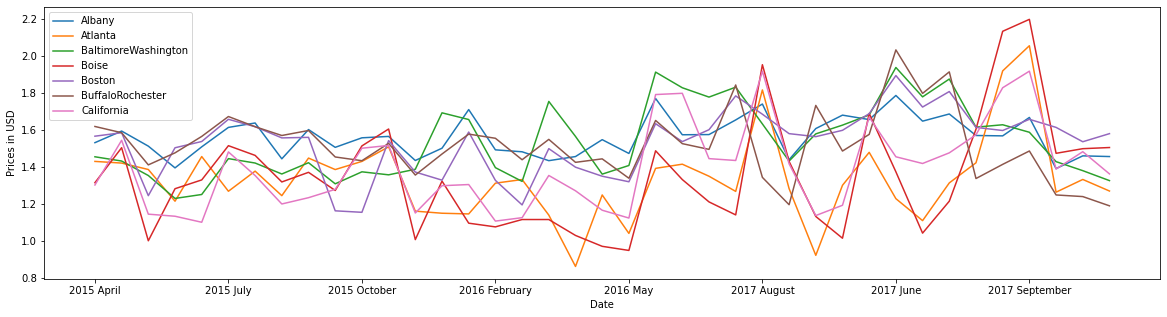

In [6]:
average_prices = avocado.groupby([avocado['region'],avocado['Date'].dt.strftime('%Y %B')])['AveragePrice'].mean().sort_index()
#print(average_prices.loc['Albany'])
plt.figure(figsize=(20,5))
regions = ['Albany','Atlanta','BaltimoreWashington','Boise','Boston','BuffaloRochester','California']
for i in regions:
    plt.plot(average_prices.loc[i],label = i)

#print(avocado['year'].unique())
plt.xticks(range(0,40,5))
plt.xlabel('Date')
plt.ylabel('Prices in USD')
plt.legend()
plt.show()


This is still better. We can go on deeper in the same way and get comparison between any two regions for any time period.

# 2) Finding the avocados sold category wise (PLU4046, PLU4225, PLU4770) 
<span id="6"></span>


### Let's start with simple visualisation

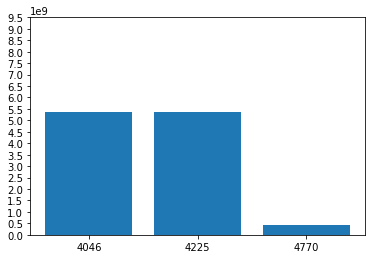

In [7]:
avocado.head()

plu4046 = avocado['4046'].sum()
plt.bar(['4046','4225','4770'],[avocado['4046'].sum(),avocado['4225'].sum(),avocado['4770'].sum()])
plt.yticks(range(1,10000000000,500000000))
plt.show()

We can clearly see that '4046' and '4225' got sold much more than '4770'

### Let's try to map the number of '4046' units sold with the average price and see if we find something interesting.
<span id="7"></span>

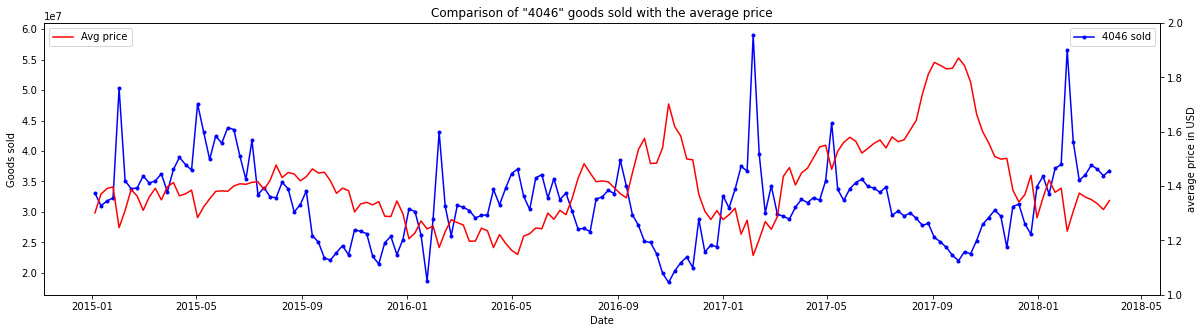

In [8]:

#Trying to map it with the average price during this time
average_price_region = avocado.groupby('Date')['AveragePrice'].mean()
#print(average_price_region)

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
#ax.figure(figsize = (20,5))
ax.plot(avocado.groupby('Date')['4046'].sum(),'b.-',label = '4046 sold')
ax2 = ax.twinx()
ax2.plot(average_price_region,'r-', label = 'Avg price')
ax.legend()
#ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Goods sold')
ax2.set_ylabel('average price in USD')
ax2.set_ylim(1,2)
ax2.legend(loc=2)
plt.title('Comparison of "4046" goods sold with the average price')

#ax.set_ylim(-20,100)
plt.show()



We can see that during the peaks of average price the sales naturally decreased. This has an almost direct negetive correlation.

### Let's have a look at others in the same way: for 'PLU4225'-
<span id="8"></span>

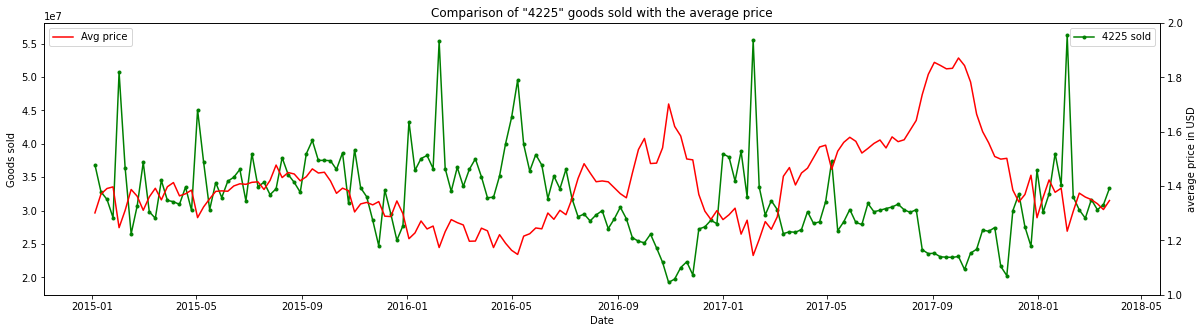

In [9]:
average_price_region = avocado.groupby('Date')['AveragePrice'].mean()
#print(average_price_region)

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
#ax.figure(figsize = (20,5))
ax.plot(avocado.groupby('Date')['4225'].sum(),'g.-',label = '4225 sold')
#avocado['Date'].sort_values(),avocado['4225']
ax2 = ax.twinx()
ax2.plot(average_price_region,'r-', label = 'Avg price')
ax.legend()
#ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Goods sold')
ax2.set_ylabel('average price in USD')
ax2.set_ylim(1,2)
ax2.legend(loc=2)
plt.title('Comparison of "4225" goods sold with the average price')

#ax.set_ylim(-20,100)
plt.show()



We have somewhat similar trend in the units being sold for '4225'. Lets plot the final category.

### For 'PLU4225'
<span id="9"></span>


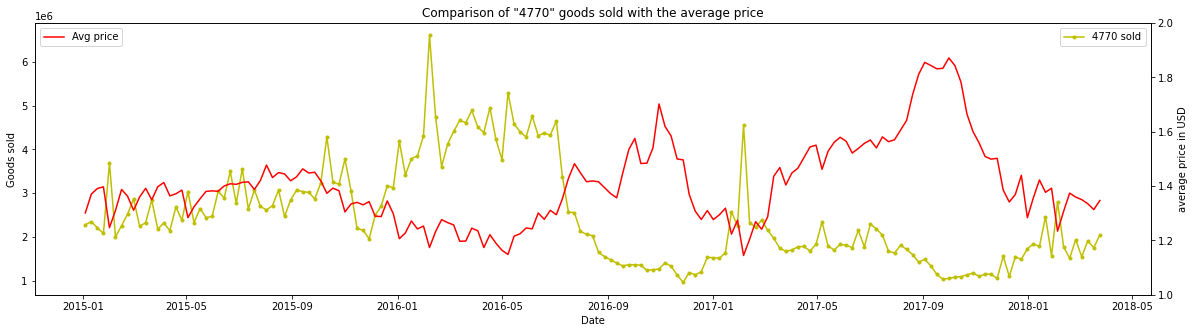

In [10]:
average_price_region = avocado.groupby('Date')['AveragePrice'].mean()
#print(average_price_region)

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
#ax.figure(figsize = (20,5))
ax.plot(avocado.groupby('Date')['4770'].sum(),'y.-',label = '4770 sold')
ax2 = ax.twinx()
ax2.plot(average_price_region,'r-', label = 'Avg price')
ax.legend()
#ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Goods sold')
ax2.set_ylabel('average price in USD')
ax2.set_ylim(1,2)
ax2.legend(loc=2)
plt.title('Comparison of "4770" goods sold with the average price')

#ax.set_ylim(-20,100)
plt.show()



This also has a similar trend as well. Let's have a closer look in the total sales year wise and see the difference.

In [11]:
year_sales = avocado.groupby('year')["Total Volume"].sum()
print(year_sales)

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64


Highest total sales are present in the year 2017 which is interesting as the average price is seen greater during this year.

# 3)Avocados sold based on region<span id="10"></span>


### Plotting a bar graph based on region

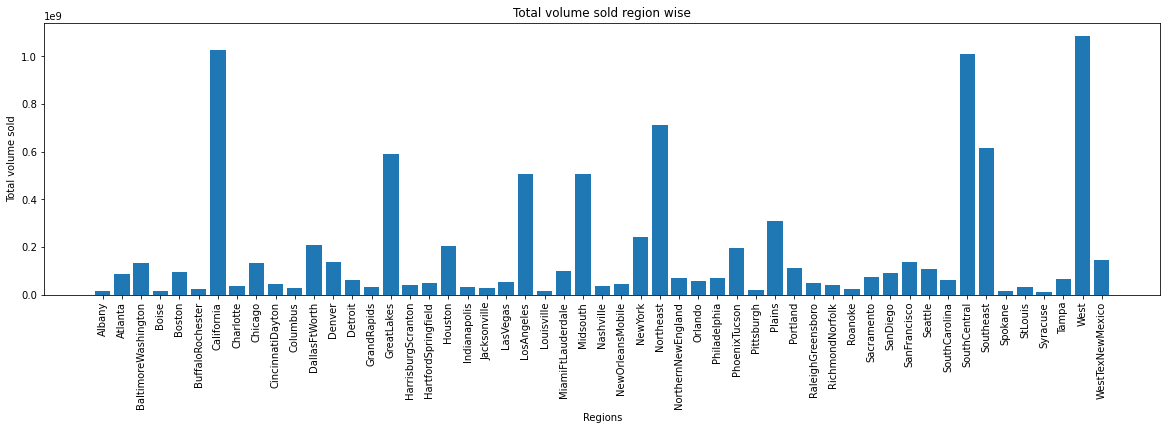

In [12]:
region_sales = avocado.groupby('region')['Total Volume'].sum().drop(['TotalUS'])
regions_total = avocado['region'].unique()
#removing TotalUS entry
regions_total = np.delete(regions_total,-3)

plt.figure(figsize = (20,5))
plt.bar(regions_total,region_sales)
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Total volume sold')
plt.title('Total volume sold region wise')
plt.show()

This provides a clear picture of the region wise sales.Some higher peaks are of combined cities such as 'SouthCentral' or 'Southeast' (correct me if I am wrong) which could be removed like I have removed 'TotalUS' entry.

# 4) Comparing total Convention and Organic avocados sold over time<span id="11"></span>


Text(0.5, 1.0, 'Conventional avocados sold')

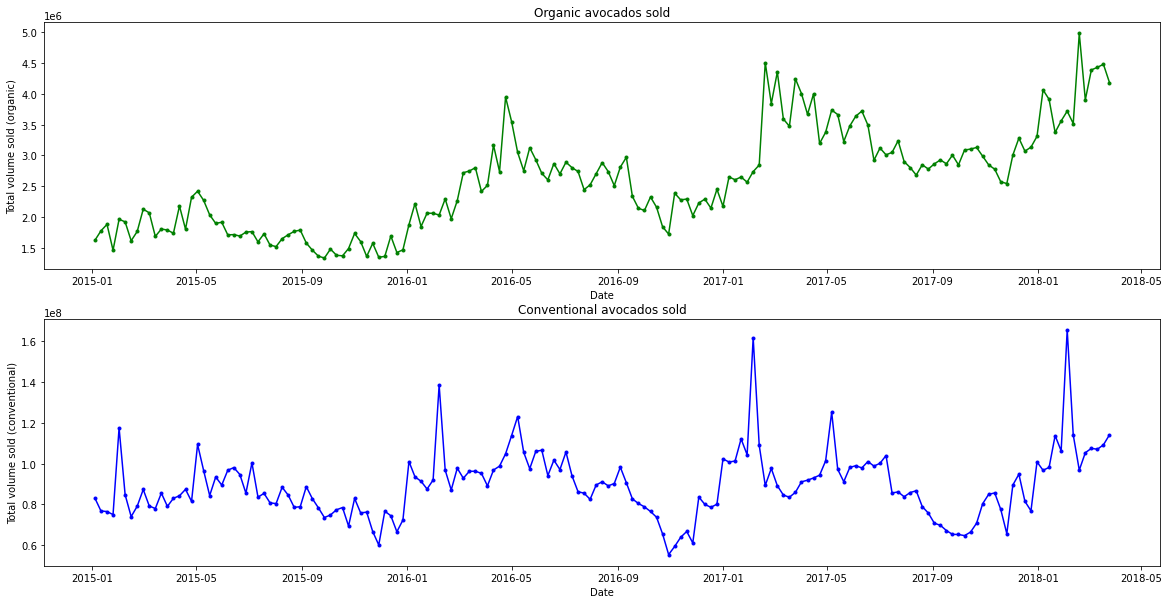

In [13]:
fig,ax = plt.subplots(2,1,figsize=(20,10))

avocados_org = avocado.loc[avocado['type'] == 'organic']
avocados_con = avocado.loc[avocado['type'] == 'conventional']

ax[0].plot(avocados_org.groupby(avocado['Date'])['Total Volume'].sum(),'g.-',label = 'Organic')
ax[1].plot(avocados_con.groupby(avocado['Date'])['Total Volume'].sum(),'b.-',label = 'Conventional')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total volume sold (conventional)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total volume sold (organic)')
ax[0].set_title('Organic avocados sold')
ax[1].set_title('Conventional avocados sold')




As we can see conventional avocados are sold an order of 10^2 more than organic. This is due to the fact that organic are expensive.

# Finally let's have some fun with the data<span id="12"></span>

### Let's see the correlation of average price and total volume for organic avocados using seaborn

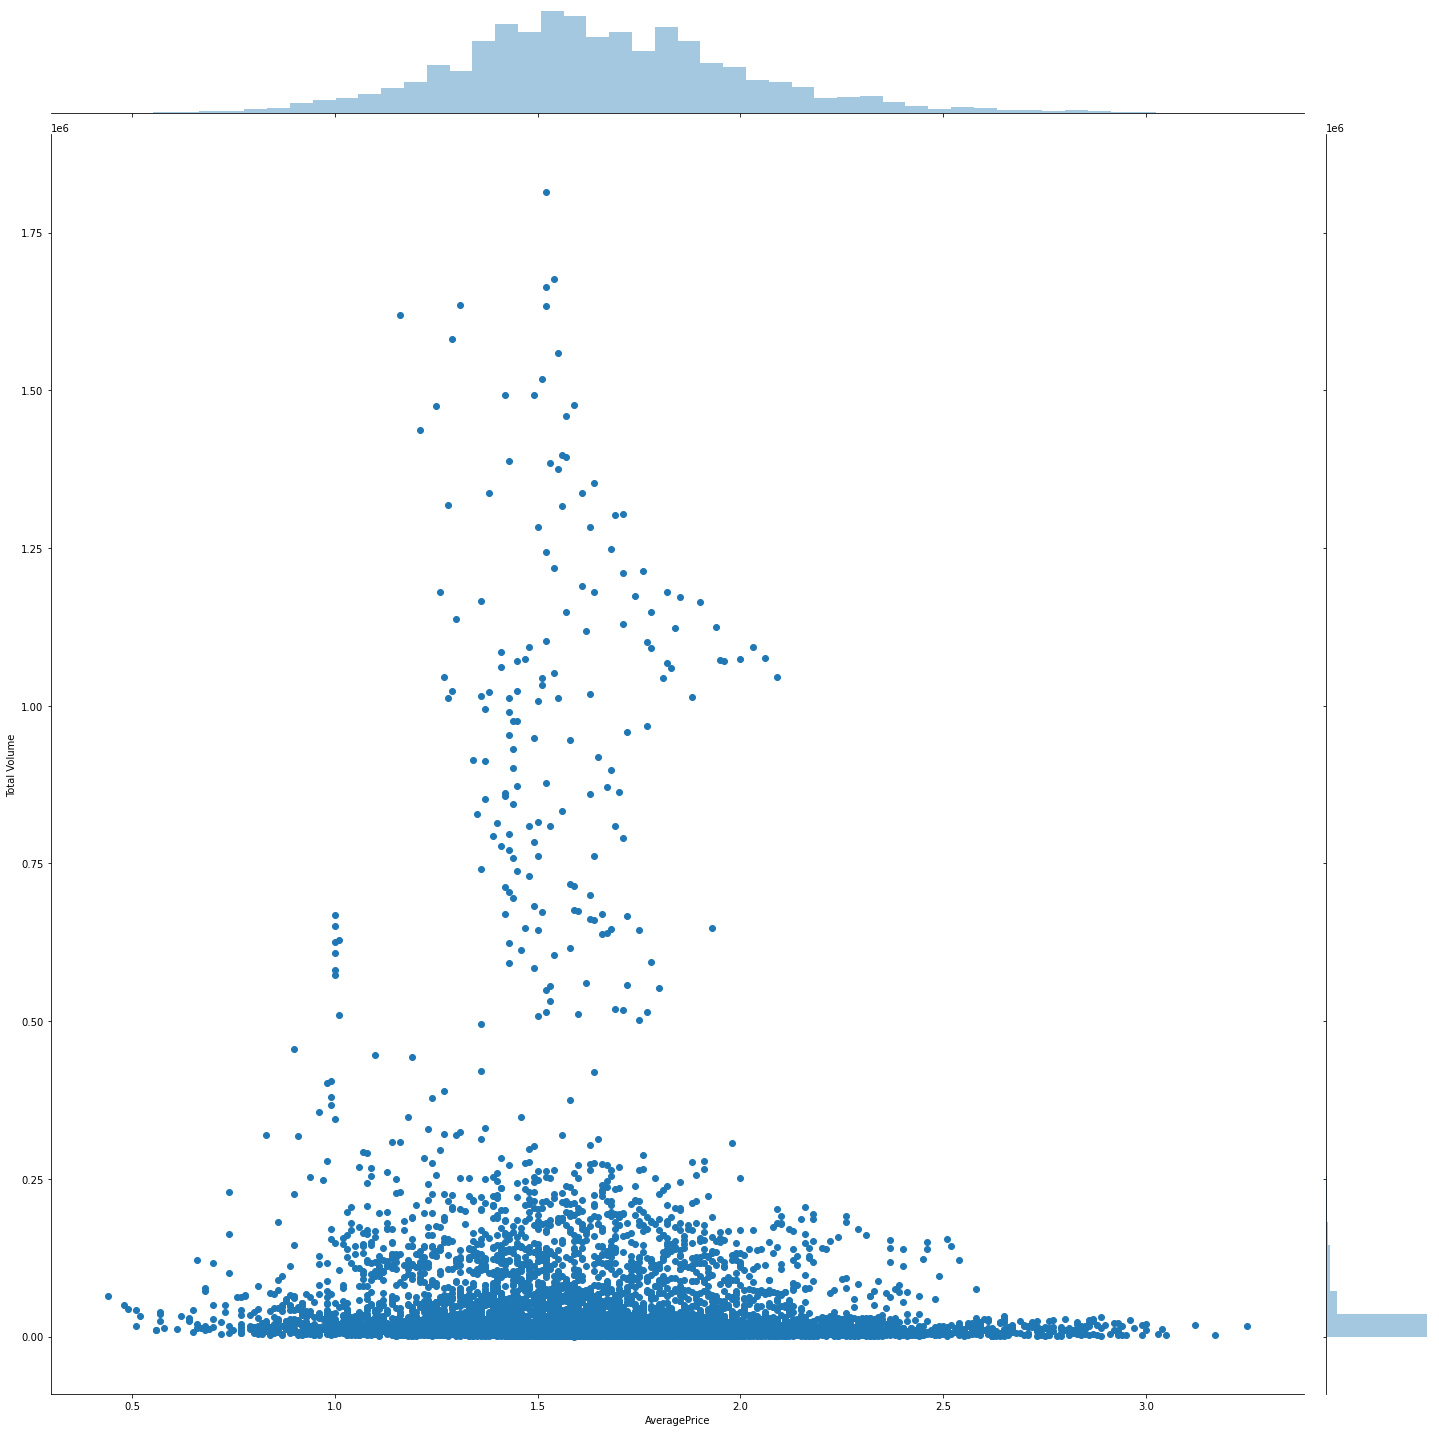

In [14]:
#print(avocado.head())
import seaborn as sns

avocado_org = avocado.loc[avocado['type'] == 'organic']
avocado_con = avocado.loc[avocado['type'] == 'conventional']

avocado_date_org = avocado_org.groupby('Date')
avocado_date_con = avocado_org.groupby('Date')

sns.jointplot(x = "AveragePrice", y = 'Total Volume', data = avocado_org,height = 20,ratio = 10)


Not much can be deciphered here. We have highest volume being sold when the average price is around 1.5 USD

### Let's try for conventional avocados

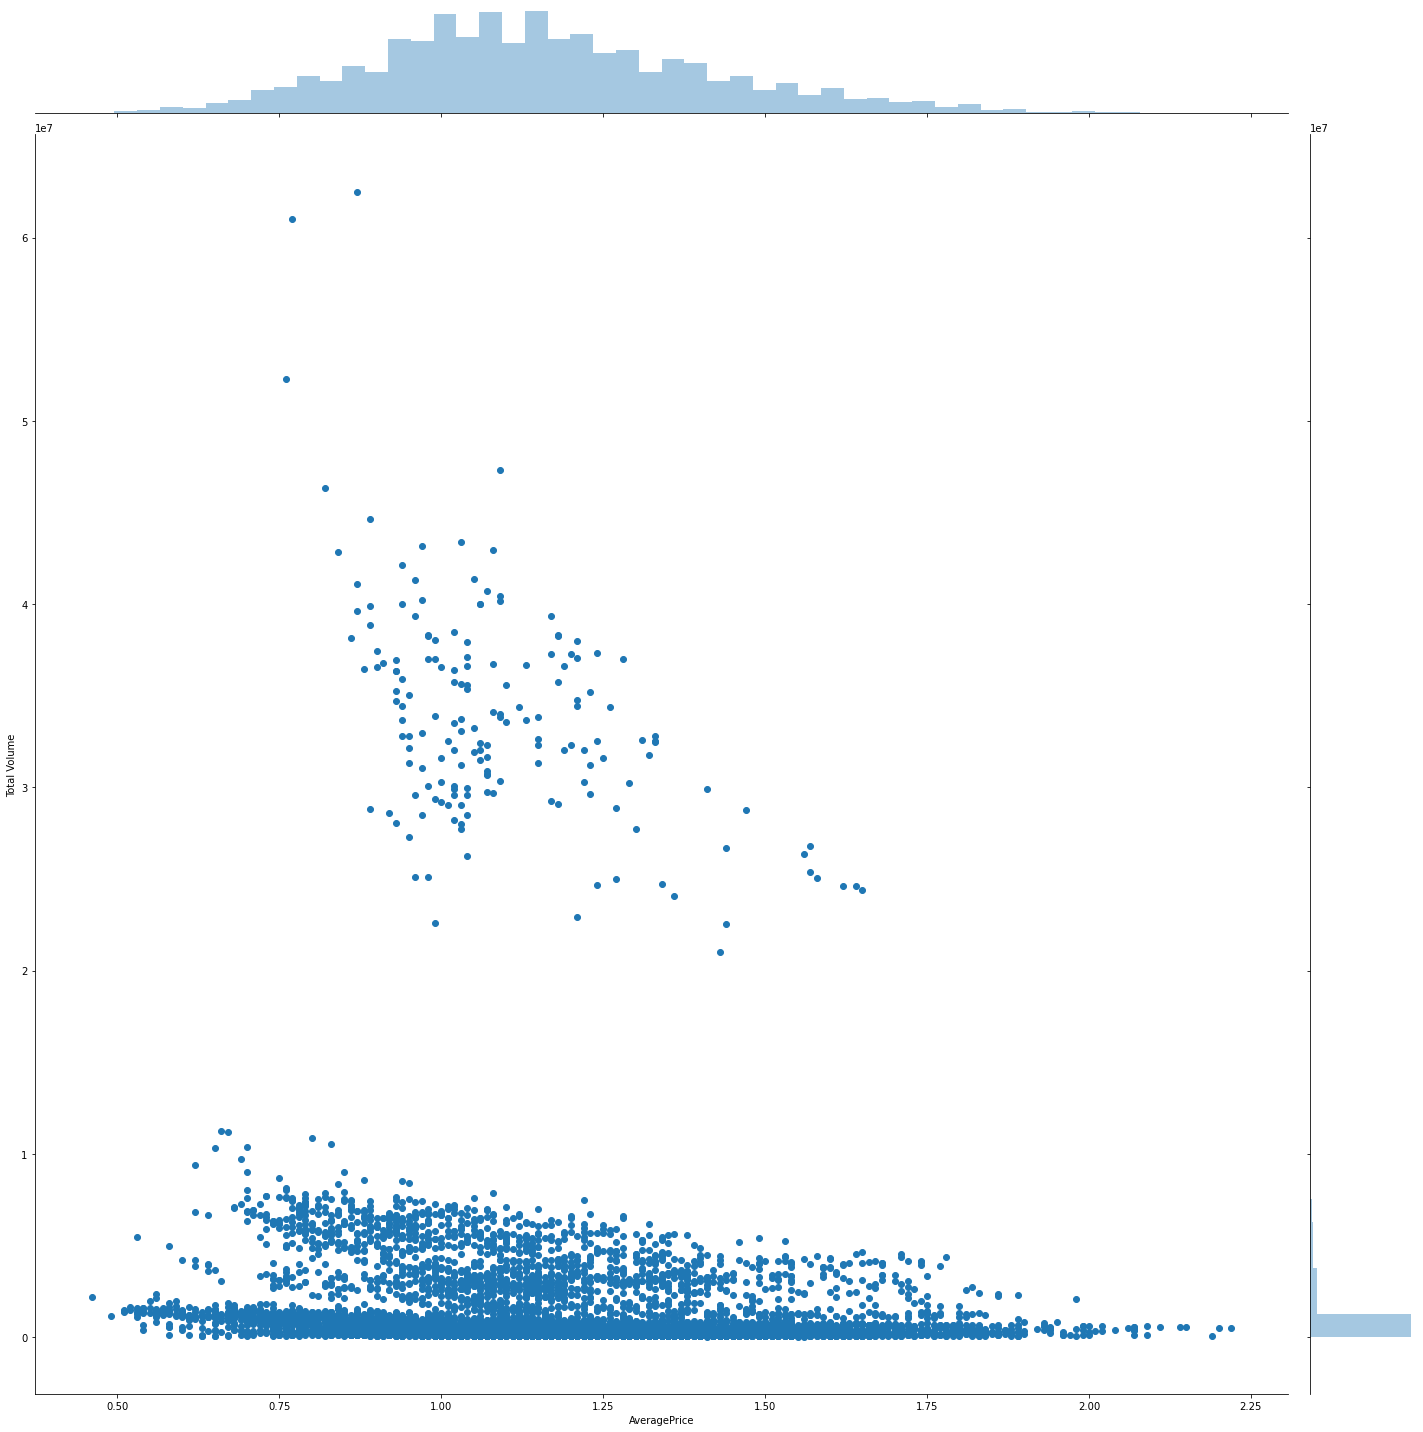

In [15]:
sns.jointplot(x = "AveragePrice", y = 'Total Volume', data = avocado_con,height = 20,ratio = 10)

We do see a clear distinction of it being bought in bulk for some entries which happen around 1-1.125 USD average price.

### Calculating and plotting the total revenue of the organic and conventional avocados

In [16]:
#Calculating the revenue for each line item
avocado['revenue'] = avocado['AveragePrice']*avocado['Total Volume']

avocado_org = avocado.loc[avocado['type'] == 'organic']
avocado_con = avocado.loc[avocado['type'] == 'conventional']

# avocado_date_org = avocado_org.groupby('Date')
# avocado_date_con = avocado_org.groupby('Date')

print(int(avocado_org['revenue'].sum()),"--Revenue generated by organic Avocados")
print(int(avocado_con['revenue'].sum()),"--Revenue generated by conventional Avocados")




680608520 --Revenue generated by organic Avocados
16253522446 --Revenue generated by conventional Avocados


The revenue of the organic avacados are around 680.6 million USD and for conventional avocados it's 16.2 billion USD

**Please provide me ideas for more things that I could have found out using the data.**

# Thanks for reading :)